In [ ]:
# Using hicrep to calculate the SCC value of Huh7 Hi-C data, which is a metric used to assess the reproducibility of replication data.

In [6]:
from hicrep.utils import readMcool
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from hicrep import hicrepSCC

In [3]:
#transform from *.hic to *.cool file
file_list=["LQL220125-7","LQL220417-17","LQL220125-8","LQL220417-17"]
resolution="100000"

# hicConvertFormat is a function of HiCExplorer(https://github.com/deeptools/HiCExplorer)
for file_name in file_list:
    os.system("hicConvertFormat -m ./%s/inter.hic --inputFormat hic --outputFormat cool -o ./%s/inter.cool --resolutions %s "%(file_name,file_name,resolution))


INFO:hicexplorer.hicConvertFormat:Converting with hic2cool.
!!! WARNING. No normalization vectors found in the hic file.


##########################
### hic2cool / convert ###
##########################
### Header info from hic
... Chromosomes:  ['All', 'chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrM', 'NC_045512v2']
... Resolutions:  [2500000, 1000000, 500000, 250000, 100000, 50000, 25000, 10000, 5000, 1000]
... Normalizations:  []
... Genome:  /xtdisk/zhangzhh_group/baixue/SARS-CoV-2/Hi-C/reference/T2T-CoV2.GenomeSize.txt
### Converting
... Resolution 100000 took: 384.71149158477783 seconds.
### Finished! Output written to: ./LQL220125-7/inter_100000.cool
... This file is single resolution and NOT higlass compatible. Run with `-r 0` for multi-resolution.


INFO:hicexplorer.hicConvertFormat:Converting with hic2cool.
!!! WARNING. No normalization vectors found in the hic file.


##########################
### hic2cool / convert ###
##########################
### Header info from hic
... Chromosomes:  ['All', 'chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrM', 'NC_045512v2']
... Resolutions:  [2500000, 1000000, 500000, 250000, 100000, 50000, 25000, 10000, 5000, 1000]
... Normalizations:  []
... Genome:  /pnas/yangyg_group/zhoujy/cov2/HiC/juicer/reference/T2T-CoV2.GenomeSize.txt
### Converting
... Resolution 100000 took: 356.1174941062927 seconds.
### Finished! Output written to: ./LQL220417-17/inter_100000.cool
... This file is single resolution and NOT higlass compatible. Run with `-r 0` for multi-resolution.


INFO:hicexplorer.hicConvertFormat:Converting with hic2cool.
!!! WARNING. No normalization vectors found in the hic file.


##########################
### hic2cool / convert ###
##########################
### Header info from hic
... Chromosomes:  ['All', 'chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrM', 'NC_045512v2']
... Resolutions:  [2500000, 1000000, 500000, 250000, 100000, 50000, 25000, 10000, 5000, 1000]
... Normalizations:  []
... Genome:  /xtdisk/zhangzhh_group/baixue/SARS-CoV-2/Hi-C/reference/T2T-CoV2.GenomeSize.txt
### Converting
... Resolution 100000 took: 408.768762588501 seconds.
### Finished! Output written to: ./LQL220125-8/inter_100000.cool
... This file is single resolution and NOT higlass compatible. Run with `-r 0` for multi-resolution.


INFO:hicexplorer.hicConvertFormat:Converting with hic2cool.
!!! WARNING. No normalization vectors found in the hic file.


##########################
### hic2cool / convert ###
##########################
### Header info from hic
... Chromosomes:  ['All', 'chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrM', 'NC_045512v2']
... Resolutions:  [2500000, 1000000, 500000, 250000, 100000, 50000, 25000, 10000, 5000, 1000]
... Normalizations:  []
... Genome:  /pnas/yangyg_group/zhoujy/cov2/HiC/juicer/reference/T2T-CoV2.GenomeSize.txt
### Converting
... Resolution 100000 took: 348.04958748817444 seconds.
### Finished! Output written to: ./LQL220417-17/inter_100000.cool
... This file is single resolution and NOT higlass compatible. Run with `-r 0` for multi-resolution.


In [4]:
# get SCC value and draw the results
def get_SCC(file1,file2,resolution,h,dBPMax,title):
    
    '''
    :param file1:  hic data replication 1 
    :param file2:  hic data replication 2 
    :param resolution:  resolution of the hic data
    :param h:   smoothing window half-size
    :param dBPMax:   maximal genomic distance to include in the calculation
    :param title:   title of the results picture
    :return:   picture of the result
    '''
    fcool1 = "./"+file1+"/inter_"+resolution+".cool"
    fcool2 = "./"+file2+"/inter_"+resolution+".cool"
    cool1, binSize1 = readMcool(fcool1, -1)
    cool2, binSize2 = readMcool(fcool2, -1)
    bDownSample = False # don't perform down-sampling 
    
    sccSub = hicrepSCC(cool1, cool2, h, dBPMax, bDownSample, np.array(['chr1', 'chr2', 'chr3', 'chr4', \
                                                                       'chr5', 'chr6', 'chr7', 'chr8', \
                                                                       'chr9', 'chr10', 'chr11', 'chr12', \
                                                                       'chr13', 'chr14', 'chr15', 'chr16', \
                                                                       'chr17', 'chr18', 'chr19', 'chr20', \
                                                                       'chr21', 'chr22', 'chrX'], dtype=str))

    chr_list=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','X'] 
    print(sccSub)
    plt.figure(figsize=(5,2))
    plt.bar(chr_list,sccSub)
    plt.title(title)
    plt.ylabel("SCC")

[0.91774557 0.90790363 0.96385096 0.94020237 0.90500915 0.90657826
 0.93093641 0.90885672 0.92801652 0.93523595 0.97674422 0.89667756
 0.86825116 0.90875334 0.96058123 0.92292652 0.92684607 0.93810209
 0.93648846 0.93471565 0.89295815 0.93567581 0.8687022 ]


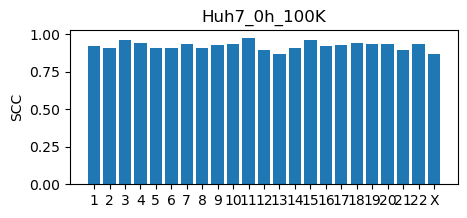

In [7]:
file1="LQL220125-7" # huh7 0h hic rep1
file2="LQL220417-17" # huh7 0h hic rep2
resolution="100000"
h=0
dBPMax=8000000
title="Huh7_0h_100K"
get_SCC(file1,file2,resolution,h,dBPMax,title)
plt.savefig("/home/wanghy/Calu3_HIC/final_data/figS5A-1.pdf", format='pdf', dpi=1000, transparent=False, bbox_inches=None, pad_inches=0.1)

[0.91180191 0.90921953 0.96434476 0.94347603 0.90957288 0.90195537
 0.92687417 0.90799768 0.9280389  0.93327292 0.9779499  0.88936935
 0.86860094 0.90772424 0.9562112  0.926588   0.92418761 0.93999619
 0.93336883 0.93335561 0.89024887 0.93007408 0.86385367]


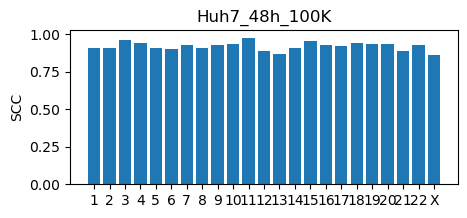

In [8]:
file1="LQL220125-8"# huh7 48h hic rep1
file2="LQL220417-18"# huh7 48h hic rep2
resolution="100000"
h=0
dBPMax=8000000
title="Huh7_48h_100K"
get_SCC(file1,file2,resolution,h,dBPMax,title)
plt.savefig("/home/wanghy/Calu3_HIC/final_data/figS5A-2.pdf", format='pdf', dpi=1000, transparent=False, bbox_inches=None, pad_inches=0.1)